# Imports

In [20]:
import numpy as np
import pandas as pd
import geopandas
import shapefile as shp
import matplotlib.pyplot as plt
import matplotlib as mpl
import shapely.wkt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify as mc
import pyproj 
import shapely
import shapely.ops as ops
from shapely.geometry.polygon import Polygon
from functools import partial

# Styling plots

In [21]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
plt.style.use('classic')

# Read Census population per neighberhood file

In [22]:
# set the filepath and load in a shapefile
shp_file_path = '/home/payam/workdir/data/neighbourhood-census-profiles-family-housing-mobility/neighbourhood-census-profiles-family-housing-mobility.shp'
shape_data_frame =  geopandas.read_file(shp_file_path)
shape_data_frame.total_popul = shape_data_frame.total_popul.astype(float) #otherwise, operations will raise errors
shape_data_frame.head(20)

,community_n,area_type,area_id_num,total_popul,population_,total_marit,married_or_,never_marri,separated_d,widowed_mar,...,total_mobil,non_movers_,movers_mobi,non_migrant,migrant_mob,internal_mi,intraprovin,interprovin,external_mi,geometry
0,Auden Park,Neighbourhood,15.0,5230.0,44.2,4235,2385,1115.0,425.0,310.0,...,4830.0,2920.0,1910.0,1330.0,575.0,460.0,340.0,115.0,120.0,POLYGON ((-76.58918635660451 44.23781953260774...
1,Bayridge West,Neighbourhood,10.0,3045.0,46.1,2470,1480,550.0,270.0,170.0,...,2780.0,1890.0,890.0,470.0,420.0,380.0,330.0,50.0,40.0,POLYGON ((-76.59061344049432 44.24262439991781...
2,Calvin Park,Neighbourhood,29.0,3630.0,41.2,3185,1600,930.0,420.0,235.0,...,3470.0,1820.0,1650.0,810.0,835.0,480.0,325.0,155.0,350.0,POLYGON ((-76.52545198378625 44.23016629443888...
3,Joyceville / Brewers Mills,Neighbourhood,43.0,1980.0,44.4,1075,790,200.0,45.0,40.0,...,1235.0,835.0,395.0,235.0,165.0,160.0,150.0,10.0,10.0,POLYGON ((-76.24469013039291 44.41918642205587...
4,Kingscourt/Novelis(Alcan),Neighbourhood,20.0,4790.0,43.0,4385,1950,1520.0,605.0,315.0,...,4740.0,2535.0,2205.0,1320.0,885.0,795.0,645.0,145.0,80.0,POLYGON ((-76.53032981023402 44.27513372299433...
5,Alwington,Neighbourhood,34.0,1090.0,46.3,785,460,265.0,35.0,25.0,...,895.0,545.0,350.0,140.0,215.0,155.0,120.0,30.0,60.0,"POLYGON ((-76.4994731896322 44.22254850387472,..."
6,Fairway Hills,Neighbourhood,30.0,2510.0,46.3,2200,1140,595.0,285.0,185.0,...,2470.0,1250.0,1215.0,700.0,515.0,420.0,365.0,55.0,95.0,POLYGON ((-76.53831405222454 44.23579975864179...
7,Grenville Park,Neighbourhood,26.0,1715.0,49.1,1355,660,425.0,185.0,90.0,...,1560.0,905.0,660.0,475.0,180.0,155.0,120.0,30.0,30.0,"POLYGON ((-76.53059851131771 44.2500753358349,..."
8,Lemoine Point,Neighbourhood,14.0,1360.0,46.6,1110,725,250.0,95.0,45.0,...,1290.0,795.0,495.0,330.0,160.0,145.0,125.0,20.0,15.0,POLYGON ((-76.59318756066864 44.23889740141339...
9,Sharpton / Glenvale,Neighbourhood,1.0,2030.0,48.1,1645,1070,385.0,135.0,65.0,...,1905.0,1325.0,585.0,400.0,180.0,180.0,125.0,50.0,0.0,POLYGON ((-76.56821225223365 44.35732547661278...


# Read Neighberhood file with locations and geometry 

In [23]:
# set the filepath and load in a shapefile
shp_file_path = '/home/payam/workdir/data/neighbourhoods/neighbourhoods.shp'
shape_data_frame_loc =  geopandas.read_file(shp_file_path)
shape_data_frame_loc.head()

,name,shape_lengt,shape_area,neighbourho,geometry
0,Marker's Acres,11058.688525,3.228050e+06,23,POLYGON ((-76.45002770788473 44.28036076059343...
1,Reddendale,13588.503415,2.143205e+06,18,POLYGON ((-76.54192181146848 44.22022150730811...
2,Queen's,4558.327586,1.013272e+06,35,POLYGON ((-76.49031753587751 44.22282593928058...
3,Calvin Park,4331.822472,1.160406e+06,29,"POLYGON ((-76.52545449482649 44.2301751078298,..."
4,Henderson,5340.411312,1.520025e+06,16,POLYGON ((-76.58090941527496 44.22929386306664...


# Adds a column to dataframe to include density (pop/area)

In [25]:
shape_data_frame['area']=shape_data_frame.apply( lambda row: row.geometry.area, axis=1)
shape_data_frame['density']= shape_data_frame['total_popul']/shape_data_frame['area']
#shape_data_frame = shape_data_frame.drop(19,axis=0) #The whole city row has to go
shape_data_frame.head(40)

,community_n,area_type,area_id_num,total_popul,population_,total_marit,married_or_,never_marri,separated_d,widowed_mar,...,movers_mobi,non_migrant,migrant_mob,internal_mi,intraprovin,interprovin,external_mi,geometry,area,density
0,Auden Park,Neighbourhood,15.0,5230.0,44.2,4235,2385,1115.0,425.0,310.0,...,1910.0,1330.0,575.0,460.0,340.0,115.0,120.0,POLYGON ((-76.58918635660451 44.23781953260774...,0.000219,2.391120e+07
1,Bayridge West,Neighbourhood,10.0,3045.0,46.1,2470,1480,550.0,270.0,170.0,...,890.0,470.0,420.0,380.0,330.0,50.0,40.0,POLYGON ((-76.59061344049432 44.24262439991781...,0.000206,1.479967e+07
2,Calvin Park,Neighbourhood,29.0,3630.0,41.2,3185,1600,930.0,420.0,235.0,...,1650.0,810.0,835.0,480.0,325.0,155.0,350.0,POLYGON ((-76.52545198378625 44.23016629443888...,0.000131,2.775684e+07
3,Joyceville / Brewers Mills,Neighbourhood,43.0,1980.0,44.4,1075,790,200.0,45.0,40.0,...,395.0,235.0,165.0,160.0,150.0,10.0,10.0,POLYGON ((-76.24469013039291 44.41918642205587...,0.011303,1.751816e+05
4,Kingscourt/Novelis(Alcan),Neighbourhood,20.0,4790.0,43.0,4385,1950,1520.0,605.0,315.0,...,2205.0,1320.0,885.0,795.0,645.0,145.0,80.0,POLYGON ((-76.53032981023402 44.27513372299433...,0.000833,5.751720e+06
5,Alwington,Neighbourhood,34.0,1090.0,46.3,785,460,265.0,35.0,25.0,...,350.0,140.0,215.0,155.0,120.0,30.0,60.0,"POLYGON ((-76.4994731896322 44.22254850387472,...",0.000071,1.526956e+07
6,Fairway Hills,Neighbourhood,30.0,2510.0,46.3,2200,1140,595.0,285.0,185.0,...,1215.0,700.0,515.0,420.0,365.0,55.0,95.0,POLYGON ((-76.53831405222454 44.23579975864179...,0.000302,8.318918e+06
7,Grenville Park,Neighbourhood,26.0,1715.0,49.1,1355,660,425.0,185.0,90.0,...,660.0,475.0,180.0,155.0,120.0,30.0,30.0,"POLYGON ((-76.53059851131771 44.2500753358349,...",0.000141,1.216887e+07
8,Lemoine Point,Neighbourhood,14.0,1360.0,46.6,1110,725,250.0,95.0,45.0,...,495.0,330.0,160.0,145.0,125.0,20.0,15.0,POLYGON ((-76.59318756066864 44.23889740141339...,0.000809,1.681317e+06
9,Sharpton / Glenvale,Neighbourhood,1.0,2030.0,48.1,1645,1070,385.0,135.0,65.0,...,585.0,400.0,180.0,180.0,125.0,50.0,0.0,POLYGON ((-76.56821225223365 44.35732547661278...,0.010049,2.020159e+05


# Clean the dataframe and save the output in a file 

In [26]:
cleaned_shape_data_frame = shape_data_frame[['community_n','total_popul','geometry','area','density']].copy()
cleaned_shape_data_frame.to_file("geodatafile.shp")
cleaned_shape_data_frame.head(10)

,community_n,total_popul,geometry,area,density
0,Auden Park,5230.0,POLYGON ((-76.58918635660451 44.23781953260774...,0.000219,2.391120e+07
1,Bayridge West,3045.0,POLYGON ((-76.59061344049432 44.24262439991781...,0.000206,1.479967e+07
2,Calvin Park,3630.0,POLYGON ((-76.52545198378625 44.23016629443888...,0.000131,2.775684e+07
3,Joyceville / Brewers Mills,1980.0,POLYGON ((-76.24469013039291 44.41918642205587...,0.011303,1.751816e+05
4,Kingscourt/Novelis(Alcan),4790.0,POLYGON ((-76.53032981023402 44.27513372299433...,0.000833,5.751720e+06
5,Alwington,1090.0,"POLYGON ((-76.4994731896322 44.22254850387472,...",0.000071,1.526956e+07
6,Fairway Hills,2510.0,POLYGON ((-76.53831405222454 44.23579975864179...,0.000302,8.318918e+06
7,Grenville Park,1715.0,"POLYGON ((-76.53059851131771 44.2500753358349,...",0.000141,1.216887e+07
8,Lemoine Point,1360.0,POLYGON ((-76.59318756066864 44.23889740141339...,0.000809,1.681317e+06
9,Sharpton / Glenvale,2030.0,POLYGON ((-76.56821225223365 44.35732547661278...,0.010049,2.020159e+05


# Create scatter plot arrays

In [27]:
# Function to take and array and return geopandas locations 
def array_to_ddfl (ar) :
    locations = pd.DataFrame(ar)
    geometry = [shapely.geometry.Point(xy) for xy in zip(locations[0], locations[1])]
    objs = locations.drop([0,1], axis=1)
    crs = {'init': 'epsg:4326'}
    gdf = geopandas.GeoDataFrame(locations, crs=crs, geometry=geometry)
    return gdf

In [30]:
points = [(-76.47477074822564, 44.21146828327467),
 (-76.49923339693385, 44.23830811650369),
 (-76.50688330525088, 44.22395444330707),
 (-76.51910662209245, 44.21344487369822),
 (-76.58528531995468, 44.267386834628574),
 (-76.51809201549797, 44.27897952198265),
 (-76.4635253124361, 44.23010764833636),
 (-76.47983811526615, 44.22861059229324),
 (-76.58176080244876, 44.23834374907255),
 (-76.56326061389221, 44.22978089990183),
 (-76.45542928897628, 44.24159526769288),
 (-76.61740414205798, 44.252530495586434),
 (-76.48704169711324, 44.25307723113582),
 (-76.49978907606908, 44.23219177988851),
 (-76.5211336561366, 44.229739632104945),
 (-76.54173730798337, 44.24344854085095),
 (-76.53048974603487, 44.21757232070677),
 (-76.5307142105475, 44.22226661496251),
 (-76.54390346300492, 44.27189537183438),
 (-76.48817388466074, 44.22289009392839),
 (-76.50205214057192, 44.2237250390444),
 (-76.55919307488557, 44.229251897720715),
 (-76.58658177596568, 44.21148884308939),
 (-76.56250350057253, 44.265258700521684),
 (-76.5997281214733, 44.223060769158074),
 (-76.64258195685926, 44.27747639036359),
 (-76.45924177823761, 44.272040089286044),
 (-76.56886420148442, 44.27043786668314),
 (-76.48322210649722, 44.2181045485388),
 (-76.50172295237789, 44.241603789677356),
 (-76.64010535004832, 44.27729037228946),
 (-76.5351493509248, 44.270867905729766),
 (-76.58768314472223, 44.256197008351315),
 (-76.48078775623485, 44.256264215349105),
 (-76.55170988999465, 44.235703489685974),
 (-76.45660133331826, 44.24617520129521),
 (-76.46015418697544, 44.21454547098349),
 (-76.53313661964333, 44.24023252606113),
 (-76.4590081587831, 44.24810557088503),
 (-76.49228915847515, 44.23345670866245),
 (-76.46066268399895, 44.26355132827633),
 (-76.59316033022672, 44.25401479410841),
 (-76.5454976940133, 44.2442271367777),
 (-76.46689668511715, 44.22411494352955),
 (-76.55984078230281, 44.2438042681945),
 (-76.52438193981308, 44.22870235845585),
 (-76.64073859392361, 44.2162685139887),
 (-76.45525266094648, 44.24694106984481),
 (-76.50733348662334, 44.23210919994808),
 (-76.50492679978358, 44.244678989483916),
 (-76.61246714935703, 44.27249428153323),
 (-76.57470640030552, 44.26528296452818),
 (-76.49692454409892, 44.234500395511695),
 (-76.6348996117246, 44.26215371744325),
 (-76.54547474431821, 44.273559046965296),
 (-76.54883511977916, 44.215072095536),
 (-76.5423859442583, 44.265164133606866),
 (-76.50182653660973, 44.27812108272667),
 (-76.55196024214474, 44.26883504980533),
 (-76.46674532095781, 44.2320363348242),
 (-76.61985222356813, 44.27982214620933),
 (-76.47332090268135, 44.26151455587409),
 (-76.63689082409928, 44.2194681696972),
 (-76.62049100780258, 44.21200899861878),
 (-76.55759103671969, 44.23318766623852),
 (-76.55961235632373, 44.23198253923367),
 (-76.61541133262706, 44.228022989007094),
 (-76.52689929526407, 44.230211452316404),
 (-76.61026986008206, 44.2419526026324),
 (-76.50284099857569, 44.23136893595127),
 (-76.45515616744099, 44.262632431882324),
 (-76.639132180657, 44.217843606727335),
 (-76.6495482732021, 44.23503424994737),
 (-76.5212225253369, 44.2312322557985),
 (-76.46768608946336, 44.276761639088136),
 (-76.61340918644915, 44.22216556803222),
 (-76.49240439105056, 44.254260470091324),
 (-76.53138051624379, 44.27177902499224),
 (-76.64938576575516, 44.23191905154777),
 (-76.52200214900941, 44.22725322395148),
 (-76.62426394365191, 44.229738150336416),
 (-76.64516013693074, 44.22760853851246),
 (-76.53510418448587, 44.25212085626173),
 (-76.59083776074905, 44.24757611156134),
 (-76.64445219797148, 44.260879395041826),
 (-76.60108000147886, 44.23986845523036),
 (-76.46660074847946, 44.213890749218976),
 (-76.51432221611158, 44.26588368760368),
 (-76.61443533162068, 44.241024018661975),
 (-76.49569363066888, 44.246684540972524),
 (-76.61960349255678, 44.25042785897913),
 (-76.59438298755684, 44.24446629764506),
 (-76.47018192997355, 44.2582316246771),
 (-76.48161270700581, 44.2562785959332),
 (-76.58804237937645, 44.267342262801584),
 (-76.53641332595248, 44.25254943340005),
 (-76.45736023906251, 44.234916217135385),
 (-76.64728560478848, 44.26018611978961),
 (-76.56030603018594, 44.25070909362617),
 (-76.63326760153572, 44.26524594583172)]

In [77]:
potential_customer_flows = [23.501482004842977,
 47.77929313565268,
 46.974059813917044,
 23.936894494670753,
 45.273050842198,
 43.495402959440774,
 23.621930425561033,
 47.87030323519579,
 47.258022793017595,
 24.009281814549627,
 45.12515000968546,
 44.33852238245384,
 46.48632820751145,
 46.61699001377046,
 46.86432122588345,
 46.60753450950661,
 46.36673052410844,
 46.3667305241251,
 45.584202750405595,
 47.87030323518975,
 46.974059813918004,
 23.996984147500548,
 23.562546897520036,
 45.58420275048774,
 44.76777576567213,
 45.273050841829516,
 46.486328207445375,
 45.58420275040701,
 23.920376855535253,
 45.997697334921114,
 45.27305084186213,
 45.58420275042332,
 47.24702816403204,
 46.486328207512635,
 24.174862753079665,
 45.12515000972647,
 23.369702154695936,
 46.74707974323709,
 46.35189028754814,
 47.140844130248986,
 45.10503824983869,
 47.247028164025146,
 46.60753450949117,
 23.62552529765576,
 46.60753450949189,
 46.864321225882634,
 22.806272001430766,
 46.35189028755205,
 47.65507362555002,
 45.99769733494866,
 45.273050842000835,
 45.273050842236756,
 46.61699001374768,
 44.33852238214922,
 45.584202750397075,
 23.878181793509064,
 45.58420275049075,
 43.49540295985139,
 45.58420275044071,
 45.12515000970195,
 45.27305084188964,
 46.486328207475964,
 22.746712331375626,
 23.104351049153646,
 24.034478908224873,
 24.061044430270922,
 44.76777576552594,
 47.992996891905136,
 45.71397081711163,
 47.65507362554958,
 45.10503824979101,
 22.83317574939376,
 22.778588273392703,
 47.571680595628855,
 46.29190101417235,
 44.76777576549487,
 46.486328207528054,
 45.58420275042273,
 22.660831728560453,
 46.86432122589689,
 44.76777576541949,
 22.813396294156536,
 46.74707974323159,
 46.942803004859485,
 44.338522382027165,
 44.767775765768214,
 23.405404230795913,
 45.997697334878296,
 45.713970817057266,
 45.99769733493533,
 44.33852238243044,
 46.942803004853445,
 46.486328207502844,
 46.48632820751607,
 45.27305084219034,
 46.74707974323429,
 45.12515000965317,
 44.33852238200239,
 46.607534509492936,
 44.33852238215762]

In [31]:
business_coords = [(-76.57253100000001, 44.2607838),
 (-76.4875704, 44.2322617),
 (-76.5185193, 44.2428429),
 (-76.50031210000002, 44.2643616),
 (-76.50857060000001, 44.2247674),
 (-76.49487370000001, 44.2294949),
 (-76.5672262, 44.23523),
 (-76.4846475, 44.2317802),
 (-76.56907269999998, 44.2511182),
 (-76.49466650000002, 44.2343353),
 (-76.45580770000002, 44.2589416),
 (-76.59215520000002, 44.2375975),
 (-76.55366699999998, 44.257275),
 (-76.481567, 44.2285563),
 (-76.490152, 44.2358199),
 (-76.4780767, 44.2648901),
 (-76.49048150000002, 44.2327083),
 (-76.4806052, 44.2334802),
 (-76.56776059999999, 44.2530779),
 (-76.5236123, 44.2472682),
 (-76.5499734, 44.2572385),
 (-76.4881532, 44.2608617),
 (-76.5900125, 44.2515339),
 (-76.55672829999997, 44.25729920000001),
 (-76.49112079999998, 44.22897580000001),
 (-76.4868698, 44.24896270000001),
 (-76.49683069999998, 44.2299554),
 (-76.4998306, 44.2299066),
 (-76.45129399999998, 44.270641),
 (-76.515766, 44.2425535),
 (-76.4946257, 44.2555741)]

In [32]:
gdf = array_to_ddfl (points)
gdfb = array_to_ddfl (business_coords)

# Create map, overlayed with points

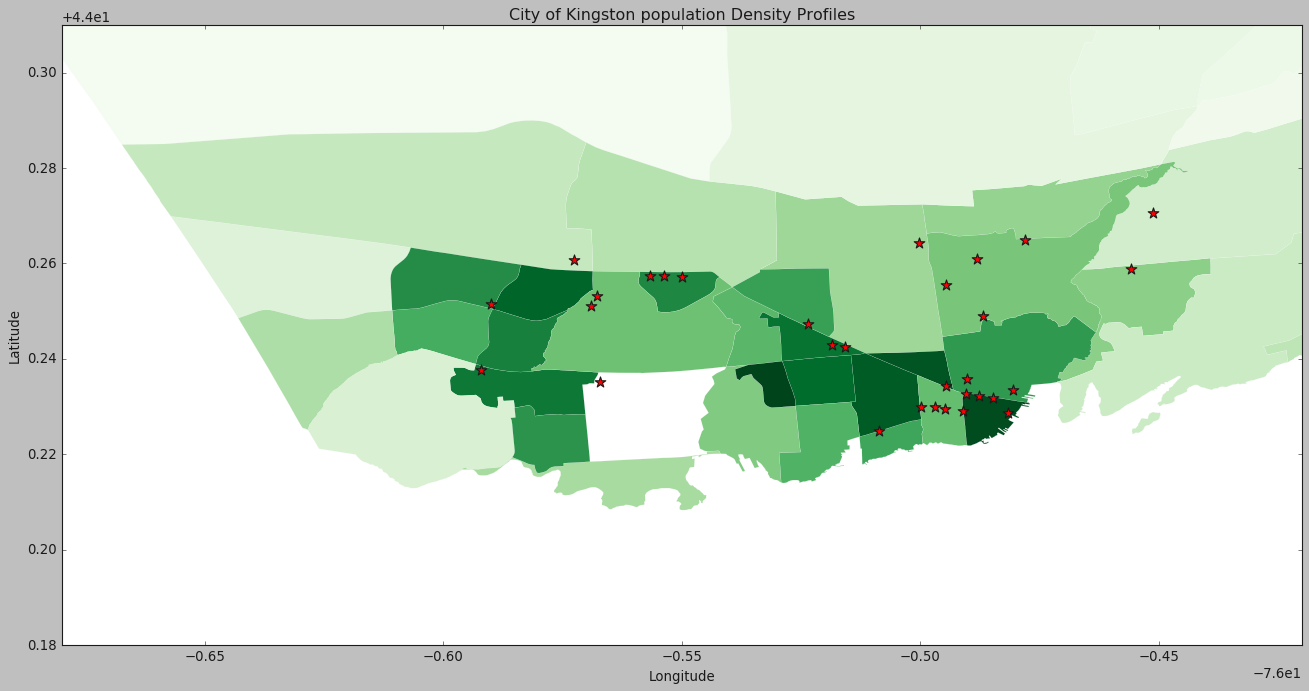

In [33]:
hr60_q10 = mc.Quantiles(shape_data_frame.density, k=100)
fig, ax = plt.subplots(figsize=(20,15), subplot_kw={'aspect':'equal'})
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
base  = shape_data_frame.assign(cl=hr60_q10.yb).plot(column='density', categorical=True, \
                              k=20, cmap='Greens', linewidth=0.1, ax=ax, \
                              edgecolor='white')
ax.set_xlim(-76.68,-76.42)
ax.set_ylim(44.18,44.31)
#gdf.plot(marker='o', c=potential_customer_flows, markersize=100, ax = base)
gdfb.plot(marker='*',  c='red', markersize=100, ax = base)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#ax.set_axis_off()
plt.title('City of Kingston population Density Profiles')
plt.savefig('Density_profiles_overlayed.png')